# 🚍 Transport Classifier (финал): обучение, визуализация, предсказания
- Обучение модели на `Train_Sample_Dataset.xlsx`
- Предсказание на `Test_Prediction_Dataset.xlsx`
- Графики, матрица ошибок, и таблица с результатами

In [ ]:
import pandas as pd
import re
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# загрузка данных
train_df = pd.read_excel("Train_Sample_Dataset.xlsx")
test_df = pd.read_excel("Test_Prediction_Dataset.xlsx")

# очистка текста
stemmer = SnowballStemmer("russian")
stopwords = {'и','в','на','что','она','мы','вы','они','а','у','как','по','из','от','до','за','то','же','так','тоже'}
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яё\s]', '', text)
    tokens = text.split()
    return " ".join([stemmer.stem(w) for w in tokens if w not in stopwords])

train_df['clean_text'] = train_df['Описание'].astype(str).apply(preprocess_text)
test_df['clean_text'] = test_df['Описание'].astype(str).apply(preprocess_text)
train_df = train_df[train_df['clean_text'].str.strip() != ""]
test_df = test_df[test_df['clean_text'].str.strip() != ""]

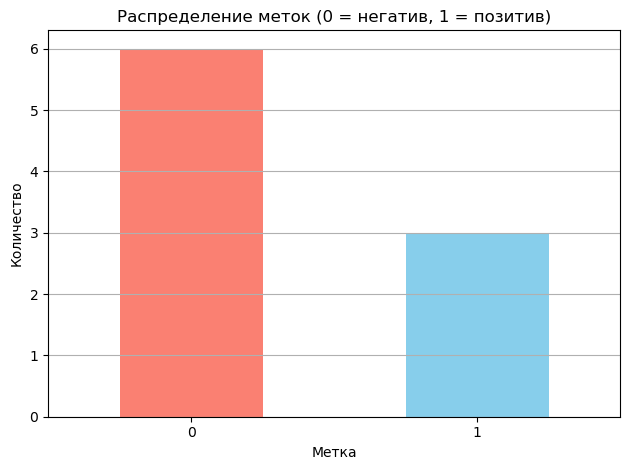

In [ ]:
# распределение меток
train_df['Решение'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Распределение меток (0 = негатив, 1 = позитив)")
plt.xlabel("Метка")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

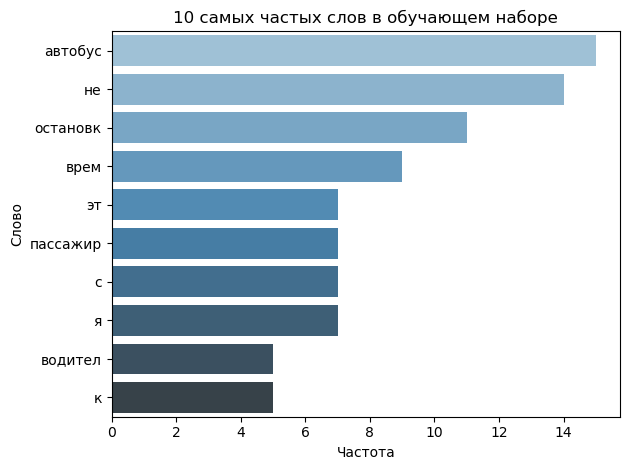

In [ ]:
# частотные слова
all_words = " ".join(train_df['clean_text']).split()
word_freq = Counter(all_words).most_common(10)
df_freq = pd.DataFrame(word_freq, columns=['Слово', 'Частота'])
sns.barplot(data=df_freq, x='Частота', y='Слово', palette="Blues_d")
plt.title("10 самых частых слов в обучающем наборе")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       136
           1       0.00      0.00      0.00         0

    accuracy                           0.91       136
   macro avg       0.50      0.46      0.48       136
weighted avg       1.00      0.91      0.95       136



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


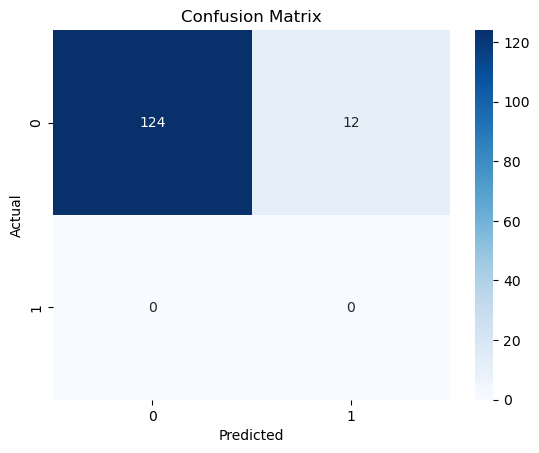

In [ ]:
# обучение и предсказание
X_train = train_df['clean_text']
y_train = train_df['Решение'].astype(int)
X_test = test_df['clean_text']
y_test = test_df['Решение'].astype(int)

vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# таблица предсказаний
test_df['Predicted'] = y_pred
test_df[['Описание', 'Predicted']].head(20)

,Описание,Predicted
0,"№ 57 маршрут, на остановке Нурлы Жол в направл...",0
1,14 м/а с 6:00-6:31 нету автобуса с Нурлы жол в...,0
2,06:00-06:35 аралығында «Ақ-Жайық» ТД аялдамасы...,0
3,"№2,13,32, 49, 50,73 Балбала аялдамасы Көктал ...",0
4,"№ 18 бағдар , мем/нөмір 862 . Медицинский цен...",0
5,Маршрут №51 не было автобуса с 06:55-07:30 с о...,0
6,"маршрут №58 продлили до ул. Карасай батыра, эт...",0
7,м/а-16 ост. Шара Жиенкулова в сторону Коктал...,0
8,Бақылаушыға шағым м/а 44 мемлекеттік бөлме584 ...,0
9,Жалоба на контролеров проверяющею проезд ...,0
